In [200]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv("datos/encoded.csv", index_col = 0)

In [212]:
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
0,5224.771092,480.0,4891.401940,4419.953028,4489.537537,-0.382606,0.0,2581.485607,4310.720546,5121.140345,3261.357242,5222.235563,6006.756621,0.0,1.0
1,5224.771092,18300.0,7797.375426,9737.349721,4489.537537,1.218855,-0.5,5438.022583,7771.228940,7663.477096,2346.622617,5222.235563,6006.756621,0.0,1.0
2,5224.771092,9800.0,11141.786746,4419.953028,8570.658072,0.790609,-0.5,5450.230558,7771.228940,8784.842776,3261.357242,5222.235563,6006.756621,0.0,1.0
3,5224.771092,1500.0,2878.317321,4419.953028,4489.537537,-0.642369,0.0,5514.101940,4310.720546,5121.140345,6109.421964,5222.235563,4265.648396,0.0,1.0
4,5224.771092,3600.0,2878.317321,4419.953028,4489.537537,-0.741195,-1.2,5680.468025,7771.228940,6320.056395,6109.421964,5222.235563,6006.756621,0.0,1.0


In [213]:
X = df.drop(columns= ["price"])
y = df["price"]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
params_tree = {
    'max_depth': [6, 8, 10, 20],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [10, 50],
    'max_leaf_nodes': [10, 20, 40, 80, 160]
}

decision_tree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=decision_tree, param_grid=params_tree, cv = 5, scoring="neg_mean_squared_error")

In [231]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10, 20],
                         'max_leaf_nodes': [10, 20, 40, 80, 160],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [10, 50]},
             scoring='neg_mean_squared_error')

In [232]:
best_tree = grid_search.best_estimator_

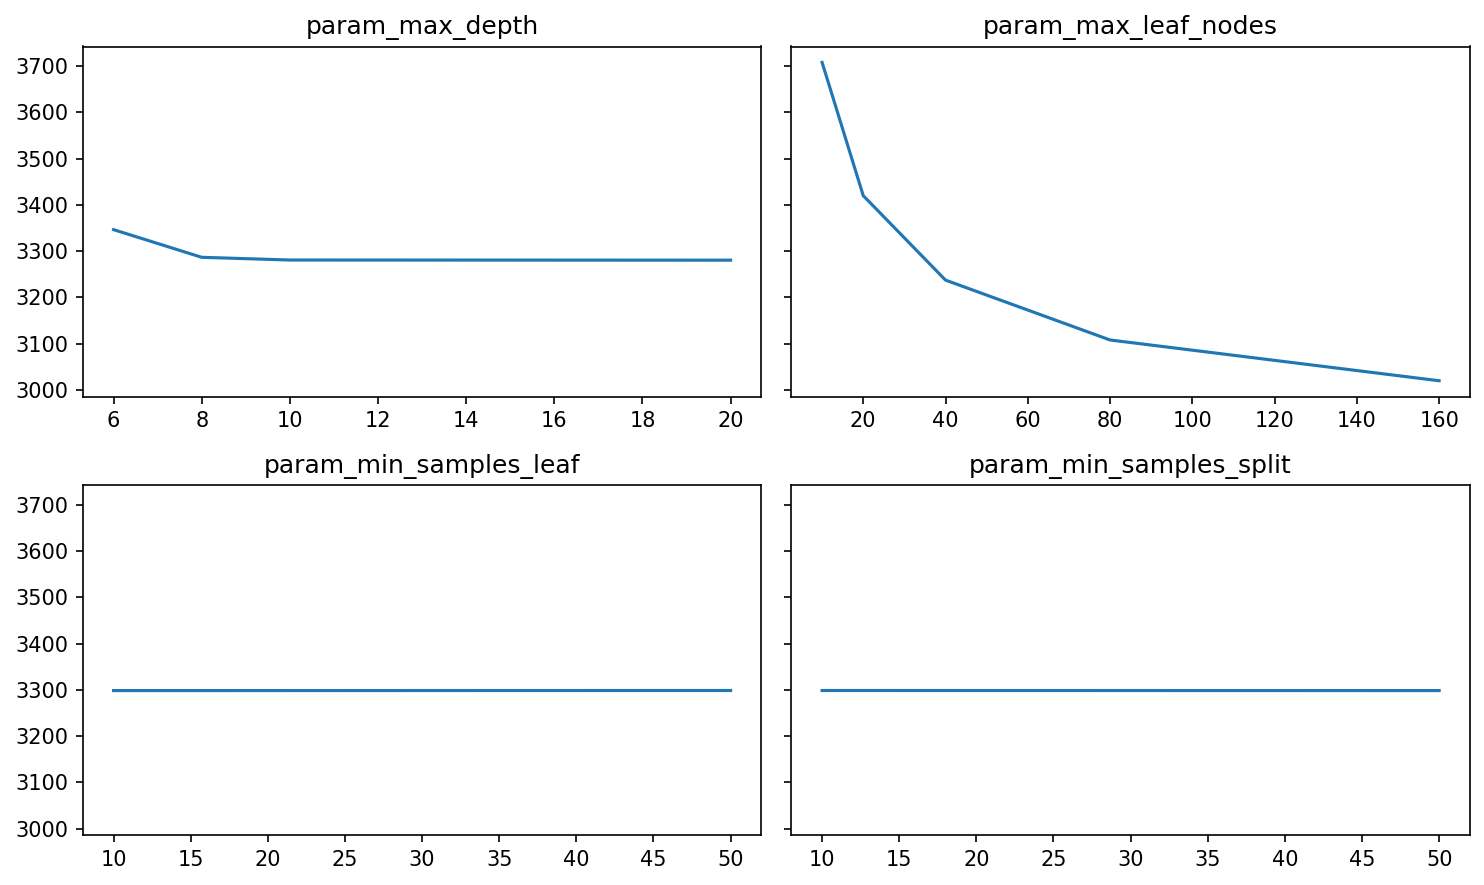

In [233]:
cv_results = pd.DataFrame(grid_search.cv_results_)

filtered_cv = cv_results.filter(like="param").drop(columns ="params")

filtered_cv["score"] = np.sqrt(abs(cv_results["mean_test_score"]))


fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
axes = axes.flat
for i, col in enumerate(filtered_cv.columns[:-1]):
    data = filtered_cv.groupby(by = col)["score"].mean()
    sns.lineplot(x = data.index, y = data.values, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

In [239]:
# for _ in tqdm(range(3)):
#     params_tree2 = {}
#     for k,v in grid_search.best_params_.items():
#         params_tree2[k] = [l for l in range(v-1, v+2)]

#     grid_search = GridSearchCV(estimator=decision_tree, param_grid=params_tree2, cv = 5, scoring="neg_mean_squared_error", verbose = 1, n_jobs = -1)
#     grid_search.fit(X_train, y_train)
    


In [234]:
# cv_results2 = pd.DataFrame(grid_search.cv_results_)

# filtered_cv2 = cv_results2.filter(like="param").drop(columns ="params")

# filtered_cv2["score"] = np.sqrt(abs(cv_results2["mean_test_score"]))


# fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
# axes = axes.flat
# for i, col in enumerate(filtered_cv2.columns[:-1]):
#     data = filtered_cv2.groupby(by = col)["score"].mean()
#     sns.lineplot(x = data.index, y = data.values, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

In [ ]:
# gs = GridSearchCV(estimator=decision_tree, param_grid={'max_depth': [6,7],
#                                                     'max_leaf_nodes': [a for a in range(80,100)],
#                                                     'min_samples_leaf': [7,8],
#                                                     'min_samples_split': [6,7]}, cv=5).fit(X_train, y_train)
# cvresults = gs.cv_results_
# bes_tree = gs.best_estimator_

In [240]:
# filtered_cv2 = pd.DataFrame(cvresults).filter(like="param").drop(columns ="params")

# filtered_cv2["score"] = np.sqrt(abs(cv_results2["mean_test_score"]))


# fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
# axes = axes.flat
# for i, col in enumerate(filtered_cv2.columns[:-1]):
#     data = filtered_cv2.groupby(by = col)["score"].mean()
#     sns.lineplot(x = data.index, y = data.values, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

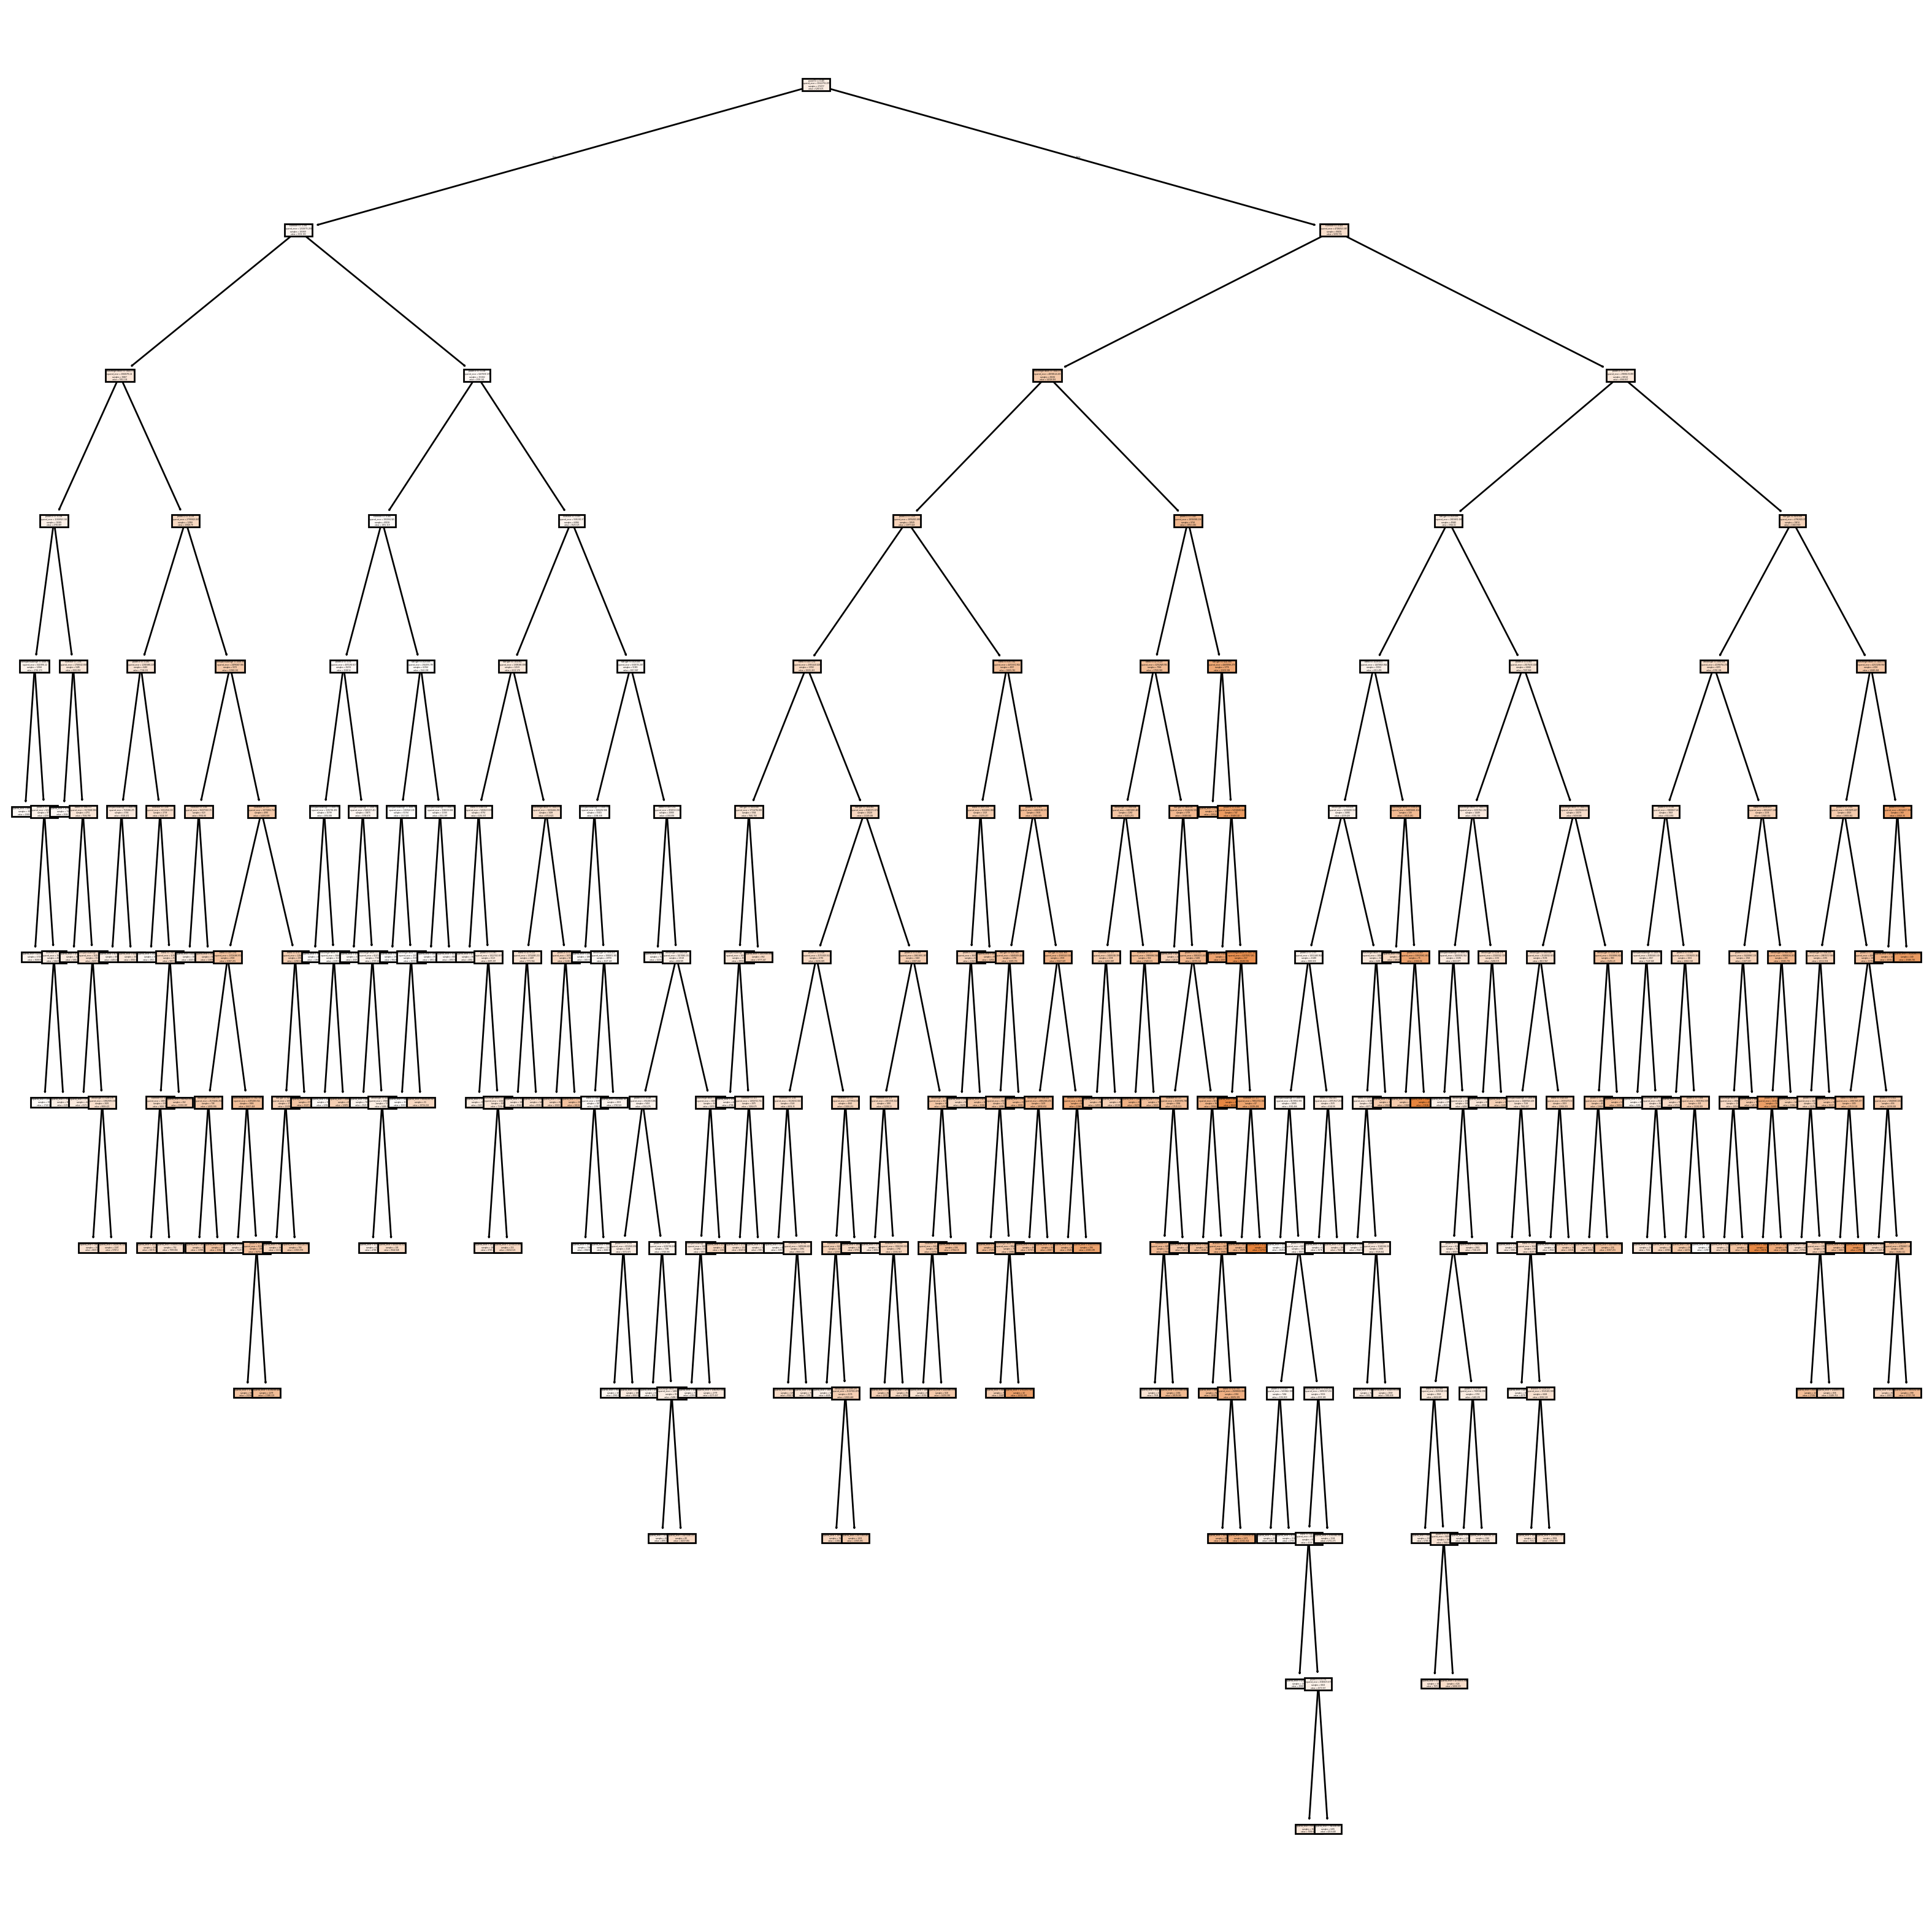

In [235]:
plt.figure(dpi = 200, figsize = (20,20))
plot_tree(decision_tree=best_tree, feature_names=X.columns, filled=True)
plt.show()

In [237]:
importances = pd.DataFrame(best_tree.feature_importances_, index = X.columns, columns=["Importance"])

In [238]:
importances.sort_values(by = "Importance",ascending=False)

,Importance
powerCV,0.498809
kilometer,0.275622
yearOfRegistration,0.106087
fuelType,0.053635
brand,0.029449
vehicleType,0.022539
notRepairedDamage,0.011762
lastSeen,0.001203
monthOfRegistration,0.000894
dateCrawled,0.000000


In [242]:
df[df["price"]>70000]

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
139454,5224.771092,75000.0,7797.375426,11036.106415,8570.658072,0.905906,0.0,5514.10194,4310.720546,7175.067853,6109.421964,5222.235563,6006.756621,0.0,1.0


In [253]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}
    return metricas

In [251]:
y_train_pred = best_tree.predict(X = X_train)
y_test_pred = best_tree.predict(X = X_test)

In [256]:
pd.DataFrame(metricas(y_train, y_train_pred, y_test, y_test_pred)).T

,r2_score,MAE,MSE,RMSE
train,0.729356,1912.641737,8.555824e+06,2925.034050
test,0.725730,1912.125669,8.617286e+06,2935.521442


Text(0.5, 0, 'Precio real')

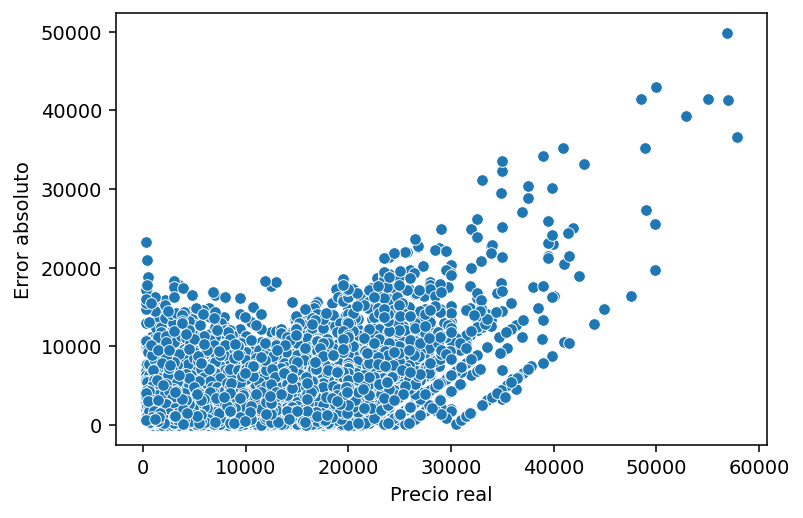

In [269]:
plt.figure(dpi = 140, figsize = (6,4))
sns.scatterplot(x = y_test, y = abs(y_test_pred-y_test))
plt.ylabel("Error absoluto")
plt.xlabel("Precio real")